# PCA & K-Means

Varianza explicada PC1: 55.74%
Varianza explicada PC2: 22.50%


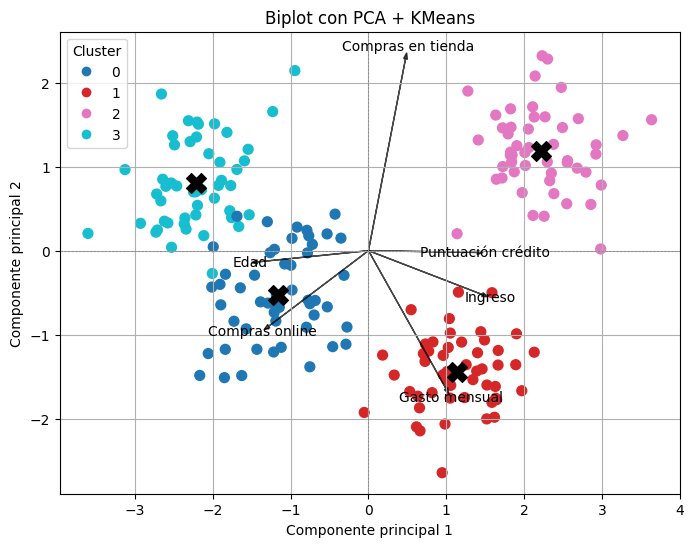

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Simular datos: 200 clientes, 6 características reales
column_names = ['Edad', 'Ingreso', 'Gasto mensual', 'Puntuación crédito', 'Compras online', 'Compras en tienda']

X, _ = make_blobs(
    n_samples=200,
    n_features=6,
    centers=4,
    cluster_std=2.5,
    random_state=42
)

df_clientes = pd.DataFrame(X, columns=column_names)

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clientes)

# PCA (2 componentes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Varianza explicada PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"Varianza explicada PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")

# KMeans (4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Centroides en espacio PCA
centros_pca = pca.transform(kmeans.cluster_centers_)

# Biplot con sklearn
plt.figure(figsize=(8, 6))

# Puntos de clientes
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=50)

# Centroides
plt.scatter(centros_pca[:, 0], centros_pca[:, 1], c='black', marker='X', s=200, label='Centroides')

# Flechas de las variables (cargas)
for i, var in enumerate(column_names):
    # Las cargas están en pca.components_.T
    plt.arrow(0, 0,
              pca.components_[0, i] * 3,  # Multiplico por 3 para que las flechas sean visibles
              pca.components_[1, i] * 3,
              color='black', alpha=0.7, head_width=0.05)
    plt.text(pca.components_[0, i] * 3.2,
             pca.components_[1, i] * 3.2,
             var, color='black', ha='center', va='center')

# Configuración del gráfico
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("Biplot con PCA + KMeans")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

In [2]:
# Mostrar cargas (loadings) de las variables en cada componente
loadings = pd.DataFrame(pca.components_.T, index=column_names, columns=['PC1', 'PC2'])
print("\nCargas (peso de cada variable en los componentes principales):")
print(loadings)


Cargas (peso de cada variable en los componentes principales):
                         PC1       PC2
Edad               -0.476247 -0.044705
Ingreso             0.487948 -0.174151
Gasto mensual       0.331987 -0.547133
Puntuación crédito  0.466022 -0.007134
Compras online     -0.427248 -0.299584
Compras en tienda   0.158631  0.760603


| Componente   | ¿Qué tipo de clientes destaca?                                    |
| ------------ | ----------------------------------------------------------------- |
| **PC1 alto** | Clientes con ingresos altos, buen crédito y gasto elevado.        |
| **PC1 bajo** | Clientes jóvenes que compran online y con menor ingreso/gasto.    |
| **PC2 alto** | Clientes que compran mucho en tienda.                             |
| **PC2 bajo** | Clientes con gasto alto en general pero más orientados al online. |
